In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Car Price Dataset.csv")

In [3]:
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [5]:
df.drop(['ID', 'Name', 'Series', 'Variant'], axis = 1, inplace=True)

In [6]:
df.describe()

,Price,Year,Kilometers,CC,Seating Capacity
count,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


In [7]:
df.isnull().sum()

Price               0
Brand               0
Model               0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(65)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.head()

,Price,Brand,Model,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Rukus,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Mercedes-Benz,V,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Mercedes-Benz,Valente,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Mercedes-Benz,E250,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,Cruze,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [12]:
cat_cols = ['Brand', 'Type', 'Gearbox', 'Fuel', 'Status', 'Color', 'Seating Capacity', 'Age']
cat_cols

['Brand',
 'Type',
 'Gearbox',
 'Fuel',
 'Status',
 'Color',
 'Seating Capacity',
 'Age']

In [13]:
# plt.figure(figsize=(15, 8))
# for z, i in enumerate(df[cat_cols]):
#     plt.subplot(4, 2, z+1)
#     ax = sns.countplot(data = df, x=i,)
#     for bars in ax.containers:
#         ax.bar_label(bars)
#     sns.despine(top=True, right=True)
#     plt.title(f"Column : {i}")
# plt.tight_layout()
# plt.show()

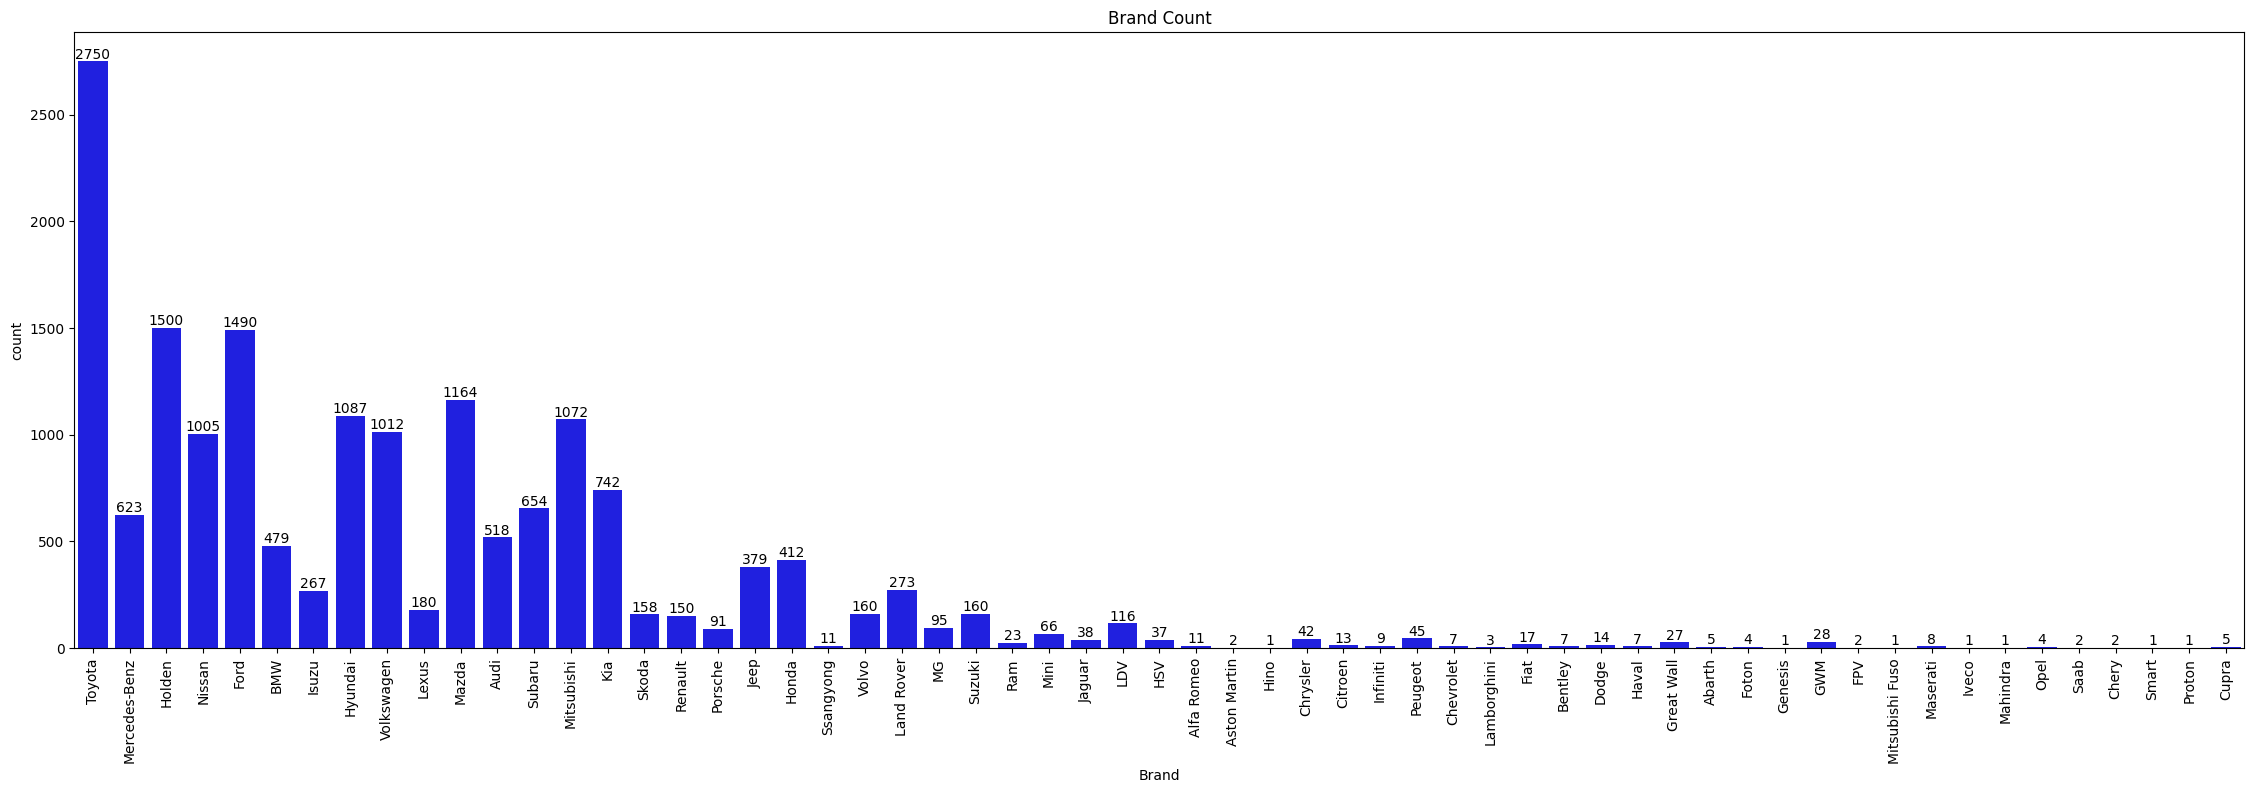

In [14]:
plt.figure(figsize=(28, 8))
ax = sns.countplot(data=df, x = "Brand", color="blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Brand Count")
plt.xticks(rotation = 90)
plt.show()

In [15]:
# Toyota brand has the most cars, followed by Holden and then Ford

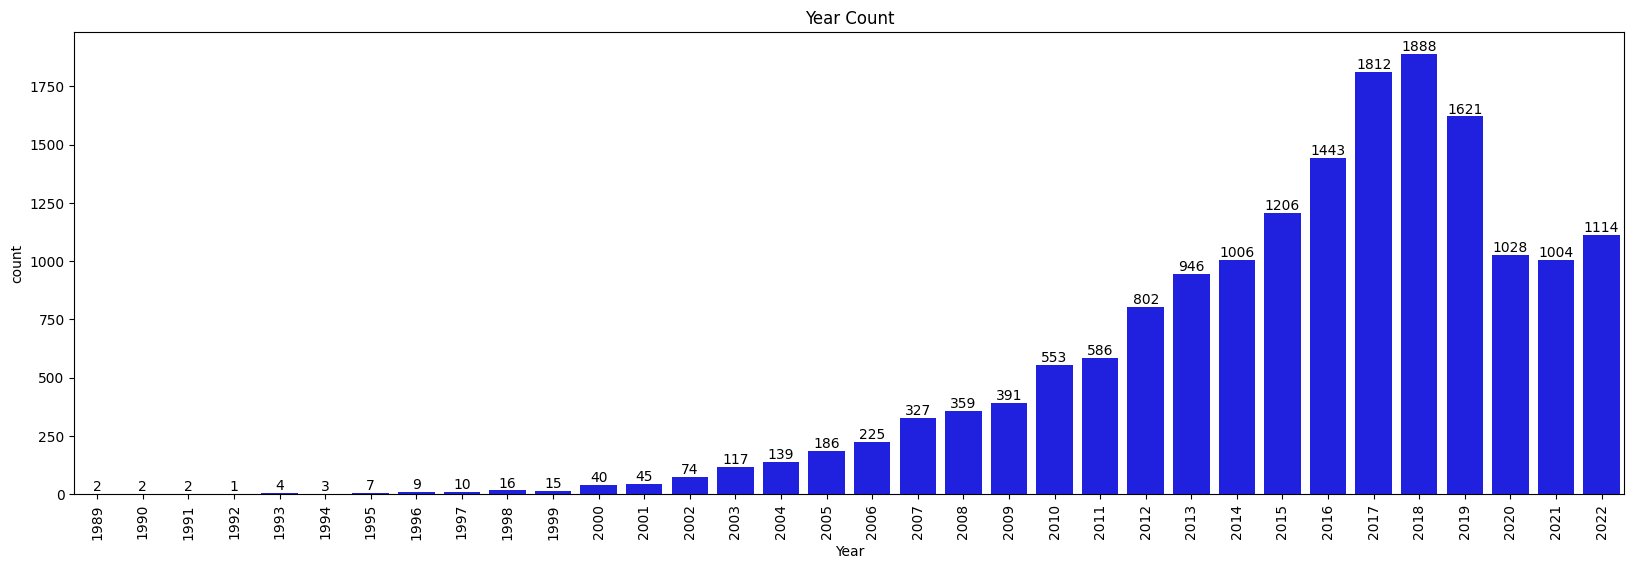

In [16]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x = "Year", color="Blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Year Count")
plt.xticks(rotation = 90)
plt.show()

In [17]:
# Most of the cars are from the year 2018, followed by 2017 and then 2019

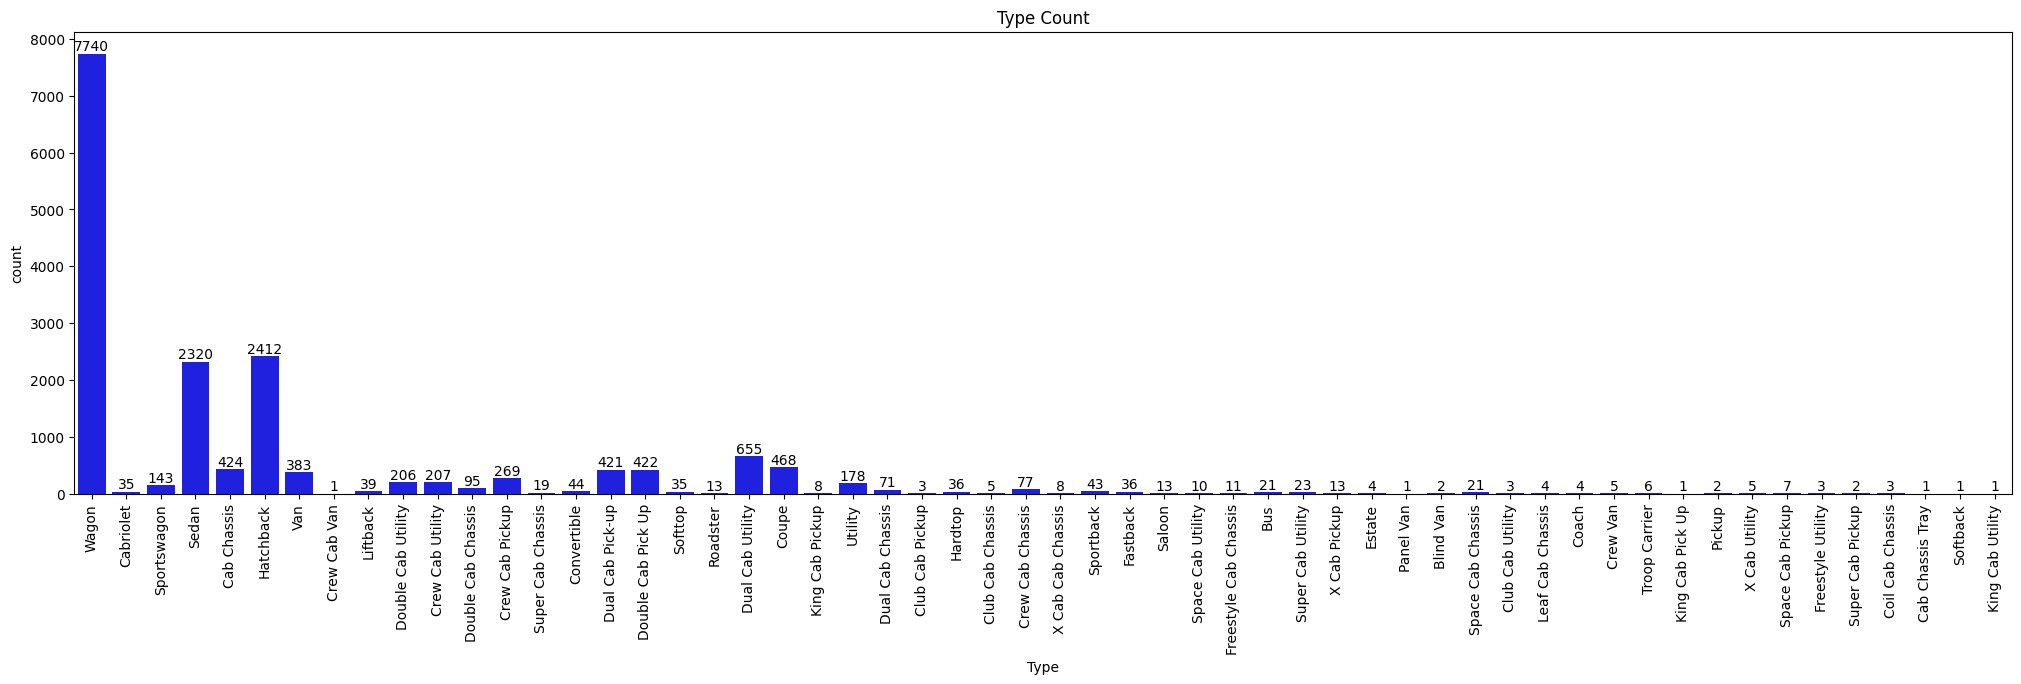

In [18]:
plt.figure(figsize=(25, 6))
ax = sns.countplot(data=df, x = "Type", color="blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Type Count")
plt.xticks(rotation = 90)
plt.show()

In [19]:
# The most used type among all the types is Wagon, then Hatchback and Sedan

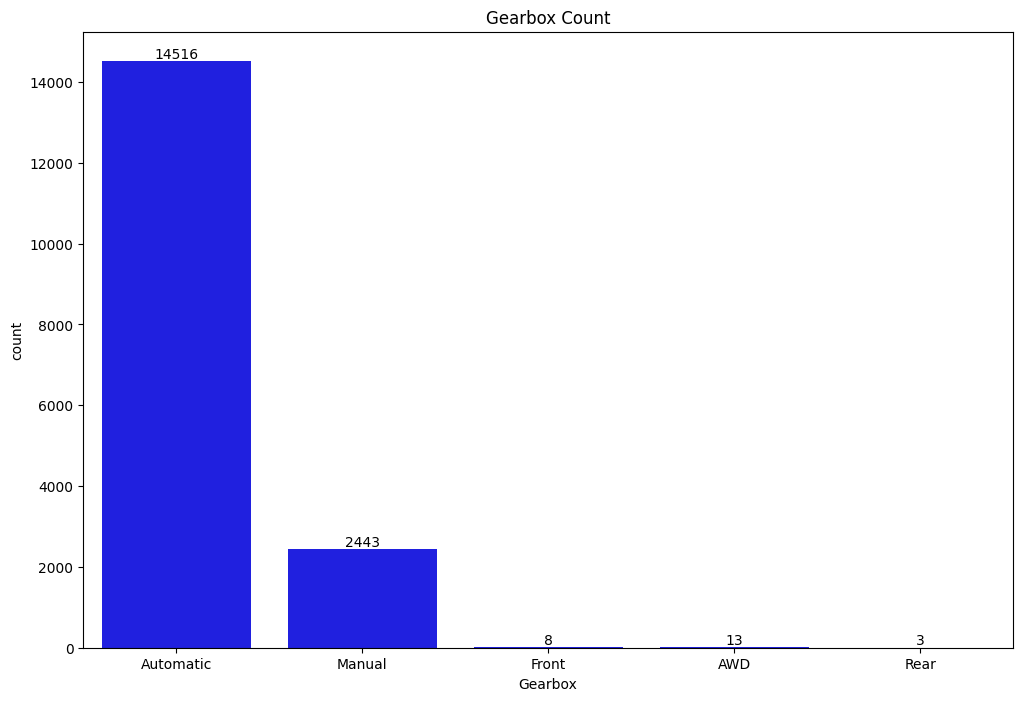

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x = "Gearbox", color="blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gearbox Count")
plt.show()

In [21]:
# The most used cars have automatic gearbox

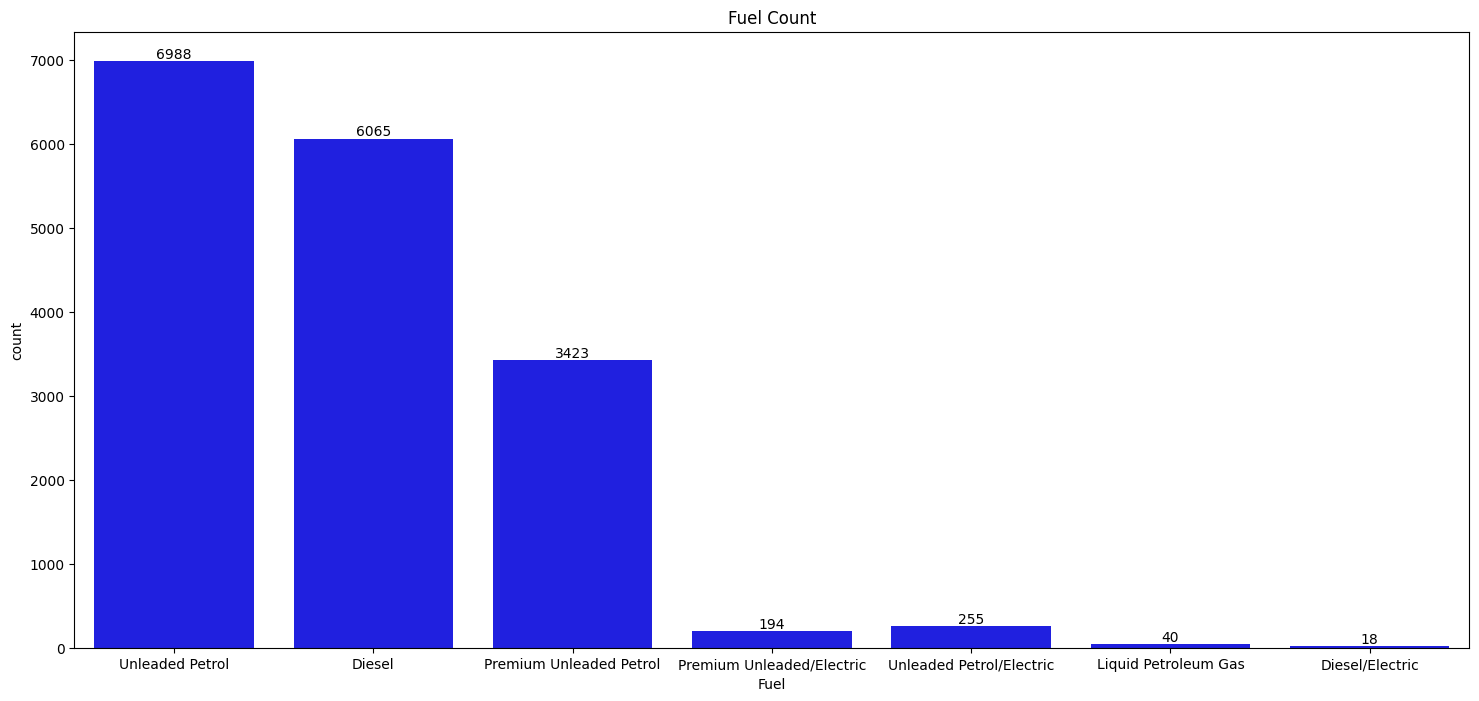

In [22]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=df, x = "Fuel", color="blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Fuel Count")
plt.show()

In [23]:
# Most of the cars have unleaded petrol , then disel and then premium unleaded petrol where Disel/Electric are the least one.

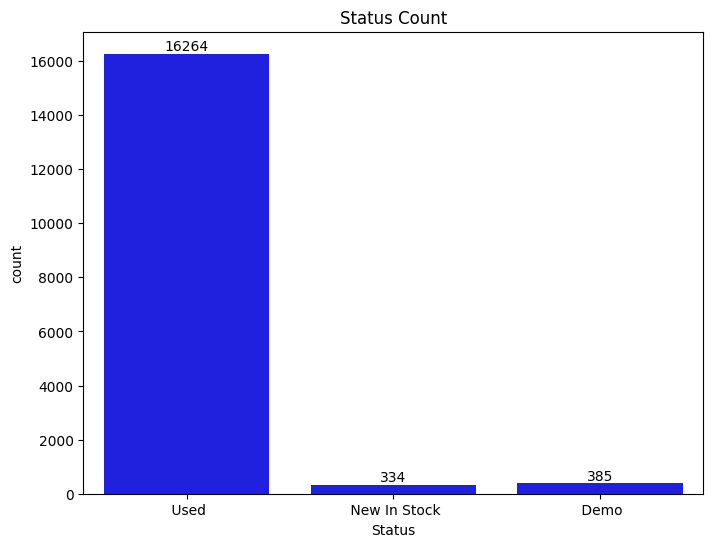

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x = "Status", color="blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Status Count")
plt.show()

In [25]:
# Most of the cars are used ones as compared to the in stock or out for demo.

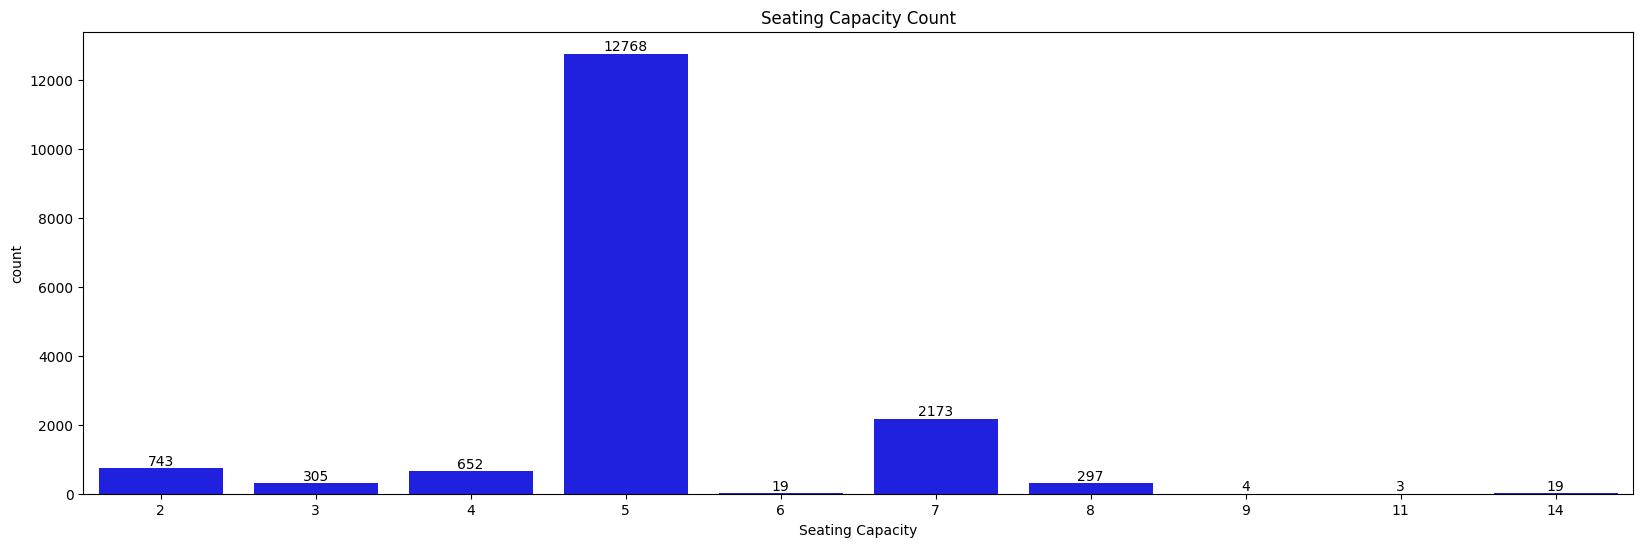

In [26]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x = "Seating Capacity", color="blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Seating Capacity Count")
plt.show()

In [27]:
# Most of the cars are 5 seater and seven seaters while 9 and 11 seaters have the least count.

In [28]:
df.head()

,Price,Brand,Model,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Rukus,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Mercedes-Benz,V,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Mercedes-Benz,Valente,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Mercedes-Benz,E250,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,Cruze,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [29]:
df["Model"].value_counts()

Model
Ranger       648
Hilux        537
Commodore    490
Triton       368
Corolla      355
            ... 
Roomster       1
Roadster       1
500X           1
Vectra         1
RC200T         1
Name: count, Length: 622, dtype: int64

In [30]:
df.shape

(16983, 12)

In [31]:
cat_cols

['Brand',
 'Type',
 'Gearbox',
 'Fuel',
 'Status',
 'Color',
 'Seating Capacity',
 'Age']

In [32]:
df["Brand"].value_counts().head(8).index.tolist()

['Toyota',
 'Holden',
 'Ford',
 'Mazda',
 'Hyundai',
 'Mitsubishi',
 'Volkswagen',
 'Nissan']

In [33]:
df["Brand"] = df["Brand"].apply(lambda x : x if x in df["Brand"].value_counts().head(8).index.tolist() else "other" )

In [34]:
df["Brand"].value_counts()

Brand
other         5903
Toyota        2750
Holden        1500
Ford          1490
Mazda         1164
Hyundai       1087
Mitsubishi    1072
Volkswagen    1012
Nissan        1005
Name: count, dtype: int64

In [35]:
df["Model"].value_counts()

Model
Ranger       648
Hilux        537
Commodore    490
Triton       368
Corolla      355
            ... 
Roomster       1
Roadster       1
500X           1
Vectra         1
RC200T         1
Name: count, Length: 622, dtype: int64

In [36]:
df["Model"] = df["Model"].apply(lambda x : x if x in df["Model"].value_counts().head(9).index.tolist() else "other" )

In [37]:
df["Model"].value_counts()

Model
other        13414
Ranger         648
Hilux          537
Commodore      490
Triton         368
Corolla        355
Navara         305
RAV4           304
Colorado       281
3              281
Name: count, dtype: int64

In [38]:
df.drop('Model', axis=1, inplace=True)

In [39]:
df["Year"].value_counts()

Year
2018    1888
2017    1812
2019    1621
2016    1443
2015    1206
2022    1114
2020    1028
2014    1006
2021    1004
2013     946
2012     802
2011     586
2010     553
2009     391
2008     359
2007     327
2006     225
2005     186
2004     139
2003     117
2002      74
2001      45
2000      40
1998      16
1999      15
1997      10
1996       9
1995       7
1993       4
1994       3
1991       2
1989       2
1990       2
1992       1
Name: count, dtype: int64

In [40]:
df["Age"] = 2025 - df["Year"]

In [41]:
df["Age"].value_counts()

Age
7     1888
8     1812
6     1621
9     1443
10    1206
3     1114
5     1028
11    1006
4     1004
12     946
13     802
14     586
15     553
16     391
17     359
18     327
19     225
20     186
21     139
22     117
23      74
24      45
25      40
27      16
26      15
28      10
29       9
30       7
32       4
31       3
34       2
36       2
35       2
33       1
Name: count, dtype: int64

In [42]:
df["Age"] = pd.cut(df["Age"], bins = [3, 7, 11, 19, 36])

In [43]:
df.drop('Year', axis=1, inplace=True)

In [44]:
df["Age"].value_counts()

Age
(3, 7]      5541
(7, 11]     5467
(11, 19]    4189
(19, 36]     672
Name: count, dtype: int64

In [45]:
df["Kilometers"].describe()

count    1.698300e+04
mean     1.034418e+05
std      8.038596e+04
min      1.000000e+00
25%      4.478550e+04
50%      8.881400e+04
75%      1.490330e+05
max      2.700000e+06
Name: Kilometers, dtype: float64

<Axes: >

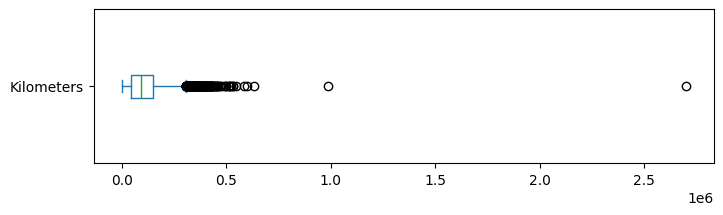

In [46]:
df["Kilometers"].plot.box(vert=False, figsize = (8, 2))

In [47]:
df["Kilometers"] = df["Kilometers"].apply(lambda x : x if x <= 500000 else 500000 )

<Axes: >

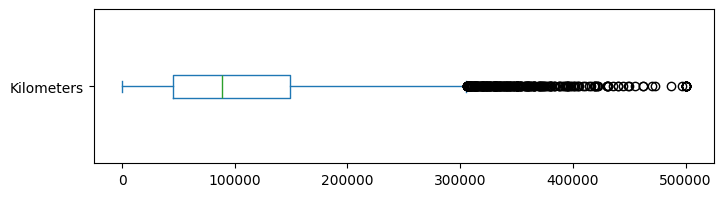

In [48]:
df["Kilometers"].plot.box(vert=False, figsize = (8, 2))

In [49]:
np.round(df["Kilometers"].describe(), 2)

count     16983.00
mean     103255.01
std       77539.52
min           1.00
25%       44785.50
50%       88814.00
75%      149033.00
max      500000.00
Name: Kilometers, dtype: float64

In [50]:
df["Type"].value_counts()

Type
Wagon                    7740
Hatchback                2412
Sedan                    2320
Dual Cab Utility          655
Coupe                     468
Cab Chassis               424
Double Cab Pick Up        422
Dual Cab Pick-up          421
Van                       383
Crew Cab Pickup           269
Crew Cab Utility          207
Double Cab Utility        206
Utility                   178
Sportswagon               143
Double Cab Chassis         95
Crew Cab Chassis           77
Dual Cab Chassis           71
Convertible                44
Sportback                  43
Liftback                   39
Hardtop                    36
Fastback                   36
Softtop                    35
Cabriolet                  35
Super Cab Utility          23
Bus                        21
Space Cab Chassis          21
Super Cab Chassis          19
X Cab Pickup               13
Saloon                     13
Roadster                   13
Freestyle Cab Chassis      11
Space Cab Utility          10
King 

In [51]:
df["Type"] = df["Type"].apply(lambda x: x if x in df["Type"].value_counts().head(3).index.to_list() else "Other")

In [52]:
df["Type"].value_counts()

Type
Wagon        7740
Other        4511
Hatchback    2412
Sedan        2320
Name: count, dtype: int64

In [53]:
df["Gearbox"].value_counts()

Gearbox
Automatic    14516
Manual        2443
AWD             13
Front            8
Rear             3
Name: count, dtype: int64

In [54]:
df = df.query("Gearbox in ('Automatic', 'Manual')")

In [55]:
df["Gearbox"].value_counts()

Gearbox
Automatic    14516
Manual        2443
Name: count, dtype: int64

In [56]:
df["Fuel"].value_counts()

Fuel
Unleaded Petrol              6986
Diesel                       6062
Premium Unleaded Petrol      3413
Unleaded Petrol/Electric      254
Premium Unleaded/Electric     186
Liquid Petroleum Gas           40
Diesel/Electric                18
Name: count, dtype: int64

In [57]:
df["Fuel"] = df["Fuel"].str.replace("Unleaded ", "").str.replace(" Unleaded", "")

In [58]:
df["Fuel"].value_counts()

Fuel
Petrol                  6986
Diesel                  6062
Premium Petrol          3413
Petrol/Electric          254
Premium/Electric         186
Liquid Petroleum Gas      40
Diesel/Electric           18
Name: count, dtype: int64

In [59]:
df["Status"].value_counts()

Status
Used            16252
Demo              374
New In Stock      333
Name: count, dtype: int64

In [60]:
df["Status"] = df["Status"].str.replace("New in ", "")

In [61]:
df["Status"].value_counts()

Status
Used            16252
Demo              374
New In Stock      333
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

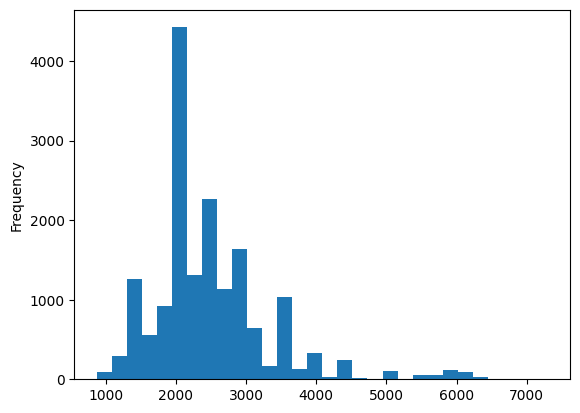

In [62]:
df["CC"].plot.hist(bins = 30)

<Axes: >

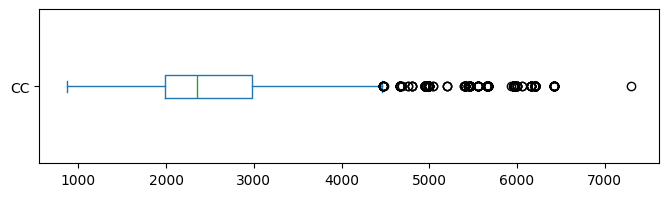

In [63]:
df["CC"].plot.box(vert=False, figsize = (8, 2))

In [64]:
df["Color"].value_counts()

Color
White       6143
Silver      2448
Grey        2419
Black       1958
Blue        1567
            ... 
Space          1
Missano        1
Velocity       1
Perl           1
Glazier        1
Name: count, Length: 234, dtype: int64

In [65]:
df["Color"] = df["Color"].apply(lambda x: x if x in df["Color"].value_counts().head(6).index.to_list() else "Other")

In [66]:
df["Color"].value_counts()

Color
White     6143
Silver    2448
Grey      2419
Black     1958
Blue      1567
Other     1267
Red       1157
Name: count, dtype: int64

In [67]:
df["Seating Capacity"].value_counts().describe()

count       10.000000
mean      1695.900000
std       3939.685082
min          3.000000
25%         19.000000
50%        301.000000
75%        719.250000
max      12751.000000
Name: count, dtype: float64

<Axes: >

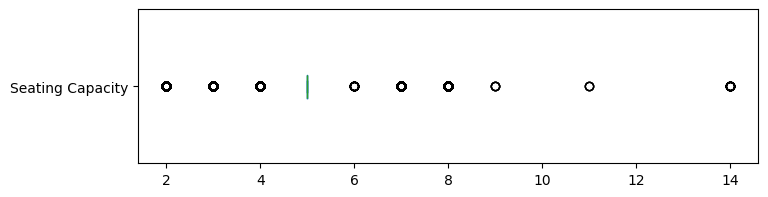

In [68]:
df["Seating Capacity"].plot.box(vert=False, figsize = (8, 2))

In [69]:
df["Seating Capacity"].value_counts()

Seating Capacity
5     12751
7      2170
2       743
4       648
3       305
8       297
14       19
6        19
9         4
11        3
Name: count, dtype: int64

In [70]:
df["Seating Capacity"] = pd.cut(df["Seating Capacity"], bins = [2, 4, 5, 7, 14])

In [71]:
df["Seating Capacity"].value_counts()

Seating Capacity
(4, 5]     12751
(5, 7]      2189
(2, 4]       953
(7, 14]      323
Name: count, dtype: int64

In [72]:
df.head()

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,263000,Wagon,Automatic,Petrol,Used,2362,Grey,"(4, 5]","(11, 19]"
1,117990,other,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,"(5, 7]","(3, 7]"
2,79990,other,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,"(7, 14]","(3, 7]"
3,34990,other,120579,Other,Automatic,Diesel,Used,2143,Black,"(2, 4]","(11, 19]"
4,15990,Holden,72506,Other,Automatic,Petrol,Used,1796,White,"(4, 5]","(7, 11]"


In [73]:
pwr_tr = PowerTransformer("yeo-johnson")

In [74]:
df[["Kilometers", "CC"]] = pwr_tr.fit_transform(df[["Kilometers", "CC"]])

<Axes: >

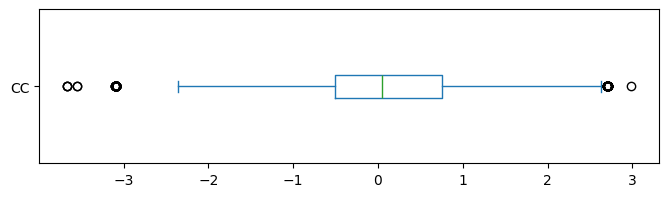

In [75]:
df["CC"].plot.box(vert=False, figsize = (8, 2))

<Axes: >

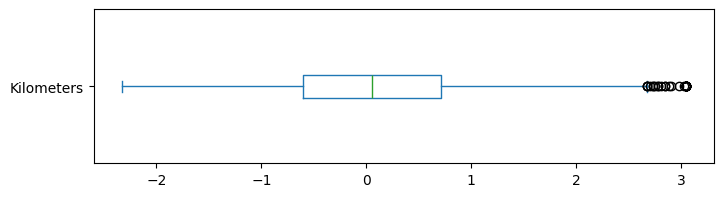

In [76]:
df["Kilometers"].plot.box(vert=False, figsize = (8, 2))

In [77]:
ohe = OneHotEncoder(drop="first")

In [78]:
encoded = ohe.fit_transform(df[cat_cols])

In [79]:
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out())

In [80]:
encoded_df

,Brand_Holden,Brand_Hyundai,Brand_Mazda,Brand_Mitsubishi,Brand_Nissan,Brand_Toyota,Brand_Volkswagen,Brand_other,Type_Other,Type_Sedan,...,Color_Silver,Color_White,"Seating Capacity_(4.0, 5.0]","Seating Capacity_(5.0, 7.0]","Seating Capacity_(7.0, 14.0]",Seating Capacity_nan,"Age_(7.0, 11.0]","Age_(11.0, 19.0]","Age_(19.0, 36.0]",Age_nan
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
df.reset_index(drop=True, inplace=True)

In [82]:
data = pd.concat([df, encoded_df], axis=1)

In [83]:
data

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,...,Color_Silver,Color_White,"Seating Capacity_(4.0, 5.0]","Seating Capacity_(5.0, 7.0]","Seating Capacity_(7.0, 14.0]",Seating Capacity_nan,"Age_(7.0, 11.0]","Age_(11.0, 19.0]","Age_(19.0, 36.0]",Age_nan
0,9999,Toyota,1.640582,Wagon,Automatic,Petrol,Used,0.055158,Grey,"(4, 5]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,117990,other,-2.296746,Wagon,Automatic,Diesel,New In Stock,-0.255328,Black,"(5, 7]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79990,other,-2.291638,Wagon,Automatic,Diesel,New In Stock,-0.255328,Black,"(7, 14]",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,34990,other,0.418290,Other,Automatic,Diesel,Used,-0.255328,Black,"(2, 4]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,15990,Holden,-0.168776,Other,Automatic,Petrol,Used,-0.846436,White,"(4, 5]",...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,4499,Holden,1.400698,Sedan,Automatic,Petrol,Used,1.424310,Other,"(4, 5]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16955,4999,Toyota,1.451251,Hatchback,Manual,Petrol,Used,-2.029073,Other,"(4, 5]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16956,7999,Holden,1.463674,Wagon,Automatic,Diesel,Used,0.774156,Other,"(5, 7]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16957,14000,Hyundai,-0.520626,Hatchback,Manual,Petrol,Used,-0.844515,Blue,"(4, 5]",...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [84]:
data.drop(cat_cols, axis=1, inplace=True)

In [85]:
data

,Price,Kilometers,CC,Brand_Holden,Brand_Hyundai,Brand_Mazda,Brand_Mitsubishi,Brand_Nissan,Brand_Toyota,Brand_Volkswagen,...,Color_Silver,Color_White,"Seating Capacity_(4.0, 5.0]","Seating Capacity_(5.0, 7.0]","Seating Capacity_(7.0, 14.0]",Seating Capacity_nan,"Age_(7.0, 11.0]","Age_(11.0, 19.0]","Age_(19.0, 36.0]",Age_nan
0,9999,1.640582,0.055158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,117990,-2.296746,-0.255328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79990,-2.291638,-0.255328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,34990,0.418290,-0.255328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,15990,-0.168776,-0.846436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,4499,1.400698,1.424310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16955,4999,1.451251,-2.029073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16956,7999,1.463674,0.774156,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16957,14000,-0.520626,-0.844515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [86]:
data.isnull().sum()

Price                           0
Kilometers                      0
CC                              0
Brand_Holden                    0
Brand_Hyundai                   0
Brand_Mazda                     0
Brand_Mitsubishi                0
Brand_Nissan                    0
Brand_Toyota                    0
Brand_Volkswagen                0
Brand_other                     0
Type_Other                      0
Type_Sedan                      0
Type_Wagon                      0
Gearbox_Manual                  0
Fuel_Diesel/Electric            0
Fuel_Liquid Petroleum Gas       0
Fuel_Petrol                     0
Fuel_Petrol/Electric            0
Fuel_Premium Petrol             0
Fuel_Premium/Electric           0
Status_ New In Stock            0
Status_ Used                    0
Color_Blue                      0
Color_Grey                      0
Color_Other                     0
Color_Red                       0
Color_Silver                    0
Color_White                     0
Seating Capaci

In [87]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [88]:
X

,Kilometers,CC,Brand_Holden,Brand_Hyundai,Brand_Mazda,Brand_Mitsubishi,Brand_Nissan,Brand_Toyota,Brand_Volkswagen,Brand_other,...,Color_Silver,Color_White,"Seating Capacity_(4.0, 5.0]","Seating Capacity_(5.0, 7.0]","Seating Capacity_(7.0, 14.0]",Seating Capacity_nan,"Age_(7.0, 11.0]","Age_(11.0, 19.0]","Age_(19.0, 36.0]",Age_nan
0,1.640582,0.055158,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-2.296746,-0.255328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.291638,-0.255328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.418290,-0.255328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.168776,-0.846436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,1.400698,1.424310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16955,1.451251,-2.029073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16956,1.463674,0.774156,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16957,-0.520626,-0.844515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
y

0          9999
1        117990
2         79990
3         34990
4         15990
          ...  
16954      4499
16955      4999
16956      7999
16957     14000
16958      5999
Name: Price, Length: 16959, dtype: int64

In [90]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=23)

In [91]:
models = [LinearRegression(), RandomForestRegressor(), AdaBoostRegressor(), KNeighborsRegressor(n_neighbors=21)]

In [92]:
for i in models:
    print(f"Model : {i}")
    i.fit(X_tr, y_tr)
    print(f"Training Score : {i.score(X_tr, y_tr)}")
    pred = i.predict(X_te)
    print(f"MSE : {mean_squared_error(y_te, pred)}")
    print(f"R2 Score : {r2_score(y_te, pred)}")
    print("=="*50)

Model : LinearRegression()
Training Score : 0.5341556942716531
MSE : 462236731.5689061
R2 Score : 0.5102662800340023
Model : RandomForestRegressor()
Training Score : 0.9705378356501254
MSE : 159110557.8013314
R2 Score : 0.8314244627564933
Model : AdaBoostRegressor()
Training Score : -0.757260589428564
MSE : 1618164314.066258
R2 Score : -0.7144237463650402
Model : KNeighborsRegressor(n_neighbors=21)
Training Score : 0.7448289873366256
MSE : 317314369.9625519
R2 Score : 0.6638096105582605


In [93]:
pca = PCA(n_components=10)
prin_comp = pca.fit_transform(X)

In [94]:
X_tr, X_te, y_tr, y_te = train_test_split(prin_comp, y, train_size=0.75, random_state=23)

In [95]:
for i in models:
    print(f"Model : {i}")
    i.fit(X_tr, y_tr)
    print(f"Training Score : {i.score(X_tr, y_tr)}")
    pred = i.predict(X_te)
    print(f"MSE : {mean_squared_error(y_te, pred)}")
    print(f"R2 Score : {r2_score(y_te, pred)}")
    print("=="*50)

Model : LinearRegression()
Training Score : 0.4915365562770848
MSE : 491942520.70514315
R2 Score : 0.4787933882782198
Model : RandomForestRegressor()
Training Score : 0.9560664016789526
MSE : 252776510.0004084
R2 Score : 0.7321866219018376
Model : AdaBoostRegressor()
Training Score : -0.4362328296596365
MSE : 1486836506.6417894
R2 Score : -0.5752836666775925
Model : KNeighborsRegressor(n_neighbors=21)
Training Score : 0.7462977388308522
MSE : 302423369.97329885
R2 Score : 0.6795864286272144


In [96]:
params = {
    "n_estimators" : [100, 150, 200],
    "criterion" : ["squared_error", "friedman_mse"],
    "max_depth" : [None, 5, 8],
    "max_features" : [1, 2]
}

In [97]:
gscv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, n_jobs=-1, cv=5, verbose=True)

In [98]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 8], 'max_features': [1, 2],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [99]:
gscv.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=150)

In [100]:
gscv.best_score_

np.float64(0.736408806026204)

In [101]:
pca = PCA(n_components=15)
prin_comp = pca.fit_transform(X)

In [102]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=23)

In [103]:
rf_model = RandomForestRegressor(n_estimators=350, max_depth=6, criterion="friedman_mse")

In [104]:
rf_model.fit(X_tr, y_tr)
print(f"Training Score : {rf_model.score(X_tr, y_tr)}")
pred = rf_model.predict(X_te)
print(f"MSE : {mean_squared_error(y_te, pred)}")
print(f"R2 Score : {r2_score(y_te, pred)}")

Training Score : 0.7850726829819162
MSE : 233091072.3311126
R2 Score : 0.753043083451791


In [105]:
X_tr, X_te, y_tr, y_te = train_test_split(prin_comp, y, train_size=0.75, random_state=23)

In [106]:
rf_model = RandomForestRegressor(n_estimators=350, max_depth=6, criterion="friedman_mse")
rf_model.fit(X_tr, y_tr)
print(f"Training Score : {rf_model.score(X_tr, y_tr)}")
pred = rf_model.predict(X_te)
print(f"MSE : {mean_squared_error(y_te, pred)}")
print(f"R2 Score : {r2_score(y_te, pred)}")

Training Score : 0.7730099187647015
MSE : 290180484.88279444
R2 Score : 0.6925576038908903
